In [14]:

import os
import cv2
import numpy as np
np.random.seed(1337)
import tensorflow
from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import Model, Sequential
import tensorflow.keras.layers
from tensorflow.keras.layers import Dropout, Dense, Flatten
from tensorflow.keras.layers import ConvLSTM2D
from keras.layers import Input, LSTM, Flatten, Dense, Dropout
from keras.models import Sequential
import tensorflow.keras.metrics as km
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [15]:
data_dir = "../input/real-life-violence-situations-dataset/Real Life Violence Dataset"
img_height , img_width = 90, 90
seq_len = 40
 
classes = ["NonViolence", "Violence"]

In [16]:
#  Creating frames from videos
 
def frames_extraction(video_path):
    frames_list = []
     
    vidObj = cv2.VideoCapture(video_path)
    # Used as counter variable 
    count = 1
 
    while count <= seq_len: 
        success, image = vidObj.read() 
        if success:
            image = cv2.resize(image, (img_height, img_width))
            frames_list.append(image)
            count += 1
        else:
            print("Defected frame")
            break
 
            
    return frames_list

In [17]:
def create_data(input_dir):
    X = []
    Y = []
     
    classes_list = os.listdir(input_dir)
     
    for c in classes_list:
        print(c)
        files_list = os.listdir(os.path.join(input_dir, c))
        for f in files_list[:600]:
            frames = frames_extraction(os.path.join(os.path.join(input_dir, c), f))
            if len(frames) == seq_len:
                X.append(frames)
             
                y = [0]*len(classes)
                y[classes.index(c)] = 1
                Y.append(y)
     
    X = np.asarray(X)
    Y = np.asarray(Y)
    return X, Y
 
X, Y = create_data(data_dir)

NonViolence
Defected frame
Defected frame
Violence


In [18]:
print(np.shape(X))
print(np.shape(Y))

(1198, 40, 90, 90, 3)
(1198, 2)


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=1)

In [21]:
num_samples, seq_len, img_height, img_width, num_channels = X_train.shape
X_train_reshaped = X_train.reshape(num_samples, seq_len, -1)


In [22]:
model = Sequential()
model.add(ConvLSTM2D(filters = 72, kernel_size = (3, 3), return_sequences = False, data_format = "channels_last", input_shape = (seq_len, img_height, img_width, 3)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(254, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(2, activation = "softmax"))

In [23]:
opt = SGD(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

In [24]:
history = model.fit(x=X_train, y=y_train, epochs=25, batch_size = 5,shuffle = False, validation_split=0.2)

Epoch 1/25


W0000 00:00:1716145720.957138    4924 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.5110 - loss: 1.8298

W0000 00:00:1716145781.219344    4921 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


154/154 ━━━━━━━━━━━━━━━━━━━━ 69s 418ms/step - accuracy: 0.5113 - loss: 1.8244 - val_accuracy: 0.6927 - val_loss: 0.6195
Epoch 2/25


W0000 00:00:1716145785.214874    4922 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


154/154 ━━━━━━━━━━━━━━━━━━━━ 60s 388ms/step - accuracy: 0.6562 - loss: 0.6177 - val_accuracy: 0.8125 - val_loss: 0.4979
Epoch 3/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 60s 389ms/step - accuracy: 0.7677 - loss: 0.4969 - val_accuracy: 0.8177 - val_loss: 0.4315
Epoch 4/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 60s 388ms/step - accuracy: 0.8389 - loss: 0.3953 - val_accuracy: 0.7969 - val_loss: 0.4419
Epoch 5/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 60s 388ms/step - accuracy: 0.9128 - loss: 0.2962 - val_accuracy: 0.7969 - val_loss: 0.3890
Epoch 6/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 60s 388ms/step - accuracy: 0.9289 - loss: 0.2139 - val_accuracy: 0.7969 - val_loss: 0.4411
Epoch 7/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 60s 388ms/step - accuracy: 0.9669 - loss: 0.1413 - val_accuracy: 0.8385 - val_loss: 0.3490
Epoch 8/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 60s 388ms/step - accuracy: 0.9785 - loss: 0.1063 - val_accuracy: 0.8438 - val_loss: 0.3312
Epoch 9/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 60s 388ms/step - accuracy: 0.9851 - loss: 0.0850 - val

In [25]:
model.save('./cctvkaggle.h5')

In [26]:
from IPython.display import FileLink
FileLink(r'./cctvkaggle.h5')

/kaggle/working/cctvkaggle.h5

In [27]:
y_pred = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 724ms/step


In [28]:
y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       126
           1       0.79      0.82      0.81       114

    accuracy                           0.81       240
   macro avg       0.81      0.81      0.81       240
weighted avg       0.81      0.81      0.81       240



In [30]:
from sklearn.metrics import confusion_matrix
mypreds = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, mypreds)
print(cm)

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 459ms/step
[[101  25]
 [ 20  94]]


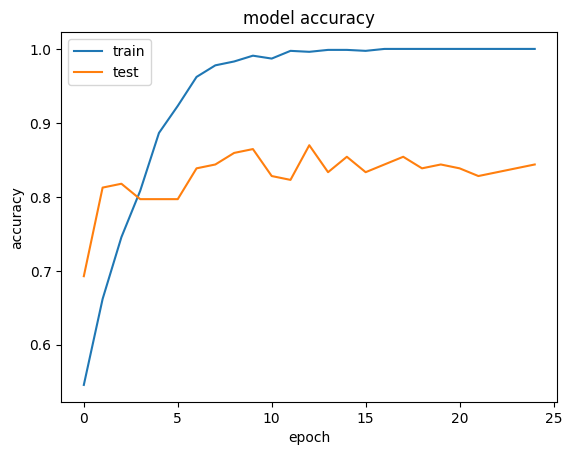

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

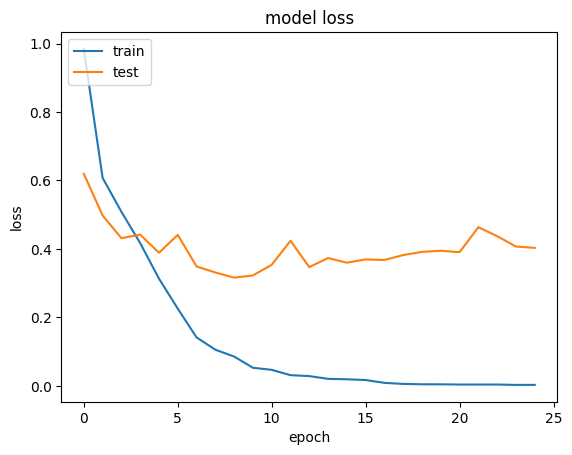

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
from keras.models import load_model
import cv2
import numpy as np

model = load_model('./cctvkaggle.h5')

video_path = '/kaggle/input/testingdata/NV_274.mp4'
category =['NonViolence', 'Violence']
frames = []
frame_count = 0
queue=[]
try:
    capture = cv2.VideoCapture(video_path)
    while (capture.isOpened()):
        ret, frame = capture.read()
        frame = cv2.resize(frame, (90, 90))
        if not ret:
            break

        frame_count += 1
        frames.append(frame)

        if frame_count < 5:
            continue 
        else:
            frame_count = 0
        sequence = []
        for image in frames:
            sequence.append(image) 

        prediction = model.predict(np.expand_dims(sequence, axis=0))
        print(prediction)
        queue.append(prediction)
        results = np.array(queue).mean(axis=0)
        i = category[np.argmax(results)]
except Exception as e:
    print(str(e))
print('Predicted: '+ i)
capture.release()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step
[[9.9999094e-01 9.0825715e-06]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step
[[9.9998355e-01 1.6413856e-05]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
[[9.9988472e-01 1.1523032e-04]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
[[9.9993896e-01 6.1047263e-05]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
[[9.9991941e-01 8.0585654e-05]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
[[9.9984050e-01 1.5949027e-04]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
[[9.999285e-01 7.146901e-05]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
[[9.9994659e-01 5.3356223e-05]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
[[9.9993265e-01 6.7327208e-05]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
[[9.9992979e-01 7.0159535e-05]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
[[9.99894619e-01 1.05343235e-04]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
[[9.9985909e-01 1.4092568e-04]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
[[9.9981171e-01 1.8832964e-04]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
[[9.9981898e-01 1.8104882e-04]]
1/1 ━━

In [35]:
from keras.models import load_model
import cv2
import numpy as np

model = load_model('./cctvkaggle.h5')

video_path = '/kaggle/input/testingdata/V_345.mp4'
category =['NonViolence', 'Violence']
frames = []
frame_count = 0
queue=[]
try:
    capture = cv2.VideoCapture(video_path)
    while (capture.isOpened()):
        ret, frame = capture.read()
        frame = cv2.resize(frame, (90, 90))
        if not ret:
            break

        frame_count += 1
        frames.append(frame)

        if frame_count < 5:
            continue 
        else:
            frame_count = 0
        sequence = []
        for image in frames:
            sequence.append(image) 

        prediction = model.predict(np.expand_dims(sequence, axis=0))
        print(prediction)
        queue.append(prediction)
        results = np.array(queue).mean(axis=0)
        i = category[np.argmax(results)]
except Exception as e:
    print(str(e))
print('Predicted: '+ i)
capture.release()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
[[0.99710053 0.00289941]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
[[0.9972976 0.0027024]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
[[0.97074145 0.02925858]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
[[0.93932974 0.06067027]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
[[0.72595733 0.27404264]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
[[0.38105434 0.61894566]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
[[0.32436815 0.6756319 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
[[0.31187183 0.6881281 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
[[0.08621275 0.91378725]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
[[0.02045322 0.9795467 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
[[3.523350e-04 9.996476e-01]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
[[2.9714772e-04 9.9970287e-01]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
[[9.1855373e-04 9.9908149e-01]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
[[2.9007343e-04 9.9970990e-01]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
[[0.00350687 0.99649316]]
1/1 ━

In [ ]:
!nvidia-smi

In [ ]:
!cat /proc/cpuinfo